In [22]:
# onedrive = r"C:\Users\Mike.Kryajak\OneDrive"
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d, plot_wall_loads
from gridtools.solps_python_scripts.read_ft44 import read_ft44
from gridtools.solps_python_scripts.utilities.last10s import read_last10s

%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [2]:
path = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")
(neut, wld) = read_ft44(where = path, save = True)

fort.44 loaded from .pkl


In [3]:
neut.keys()

dict_keys(['natm', 'nmol', 'nion', 'nfla', 'species', 'atms', 'mols', 'ions', 'dab2', 'tab2', 'dmb2', 'tmb2', 'dib2', 'tib2', 'rfluxa', 'rfluxm', 'pfluxa', 'pfluxm', 'refluxa', 'refluxm', 'pefluxa', 'pefluxm', 'emiss', 'emissmol', 'srcml', 'edissml', 'pab2', 'pmb2', 'pib2', 'dnb2', 'pnb2', 'tnb2', 'emisstot', 'daeb2', 'dmeb2', 'dneb2', 'danb2', 'taib2', 'tmib2', 'tnib2', 'vrab2', 'vpab2', 'vtab2', 'vrmb2', 'vpmb2', 'vtmb2', 'e0ab2', 'e0mb2', 'eneutrad', 'emolrad', 'eionrad', 'etotrad', 'pdena_int', 'pdenm_int', 'pdeni_int', 'pdena_int_b2', 'pdenm_int_b2', 'pdeni_int_b2', 'edena_int', 'edenm_int', 'edeni_int', 'edena_int_b2', 'edenm_int_b2', 'edeni_int_b2'])

In [9]:
g = read_b2fgmtry(where=path)



b2fgmtry loaded from .pkl


In [19]:
fluxa = neut["pefluxa"].squeeze() * (g["hy"] * g["hz"])
fluxm = neut["pefluxm"].squeeze() * (g["hy"] * g["hz"])

In [29]:
fluxa.shape

(110, 36)

In [23]:
l = read_last10s(path)

last10s loaded from .pkl


In [32]:
angle = l["ga3dl"][:,1]

(fluxa[0,:] * np.sin(np.radians(angle))).sum()

2500.682720310621

In [18]:
fluxa[0,:].sum()*1e-6 * g["b"]

0.019338605995426052

In [20]:
fluxm[0,:].sum()*1e-6

1.5784713708957294e-05

In [23]:
[print(f"{x}: {wld[x].shape}") for x in ["wldnek", "poly", "wlarea"]]

wldnek: (55, 15)
poly: (4, 42)
wlarea: (55,)


[None, None, None]

In [61]:
[poly[0,i], poly[2,i]]

[0.5792, 0.5436]

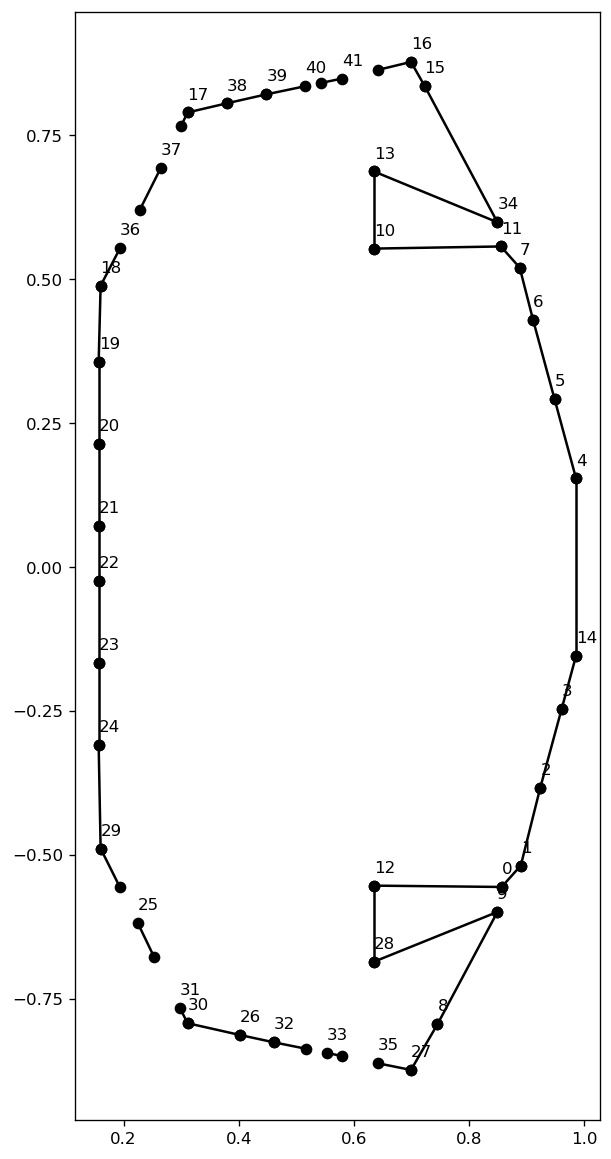

In [60]:
fig, ax = plt.subplots(dpi = 120, figsize = (6,12))

poly = wld["poly"]
# Poly is [x1, x2, y1, y2] for the two line endpoints 1 and 2

for i in range(poly.shape[1]):
    ax.plot([poly[0,i], poly[2,i]], [poly[1,i], poly[3,i]], 'ko-')
    ax.annotate(str(i), (poly[0,i], poly[1,i]),
                textcoords = "offset points",
                xytext = (0,8),
                ha = 'left')

ax.set_aspect("equal")

In [71]:
points = """0.8569   -0.5557    0.8902   -0.5186    0.8902   -0.5186    0.9241   -0.3831
    0.9241   -0.3831    0.9614   -0.2457    0.9614   -0.2457    0.9862   -0.1541
    0.9862    0.1541    0.9490    0.2915    0.9490    0.2915    0.9117    0.4289
    0.9117    0.4289    0.8884    0.5202    0.8884    0.5202    0.8556    0.5571
    0.7454   -0.7943    0.8496   -0.5991    0.8496   -0.5991    0.6351   -0.6856
    0.6351    0.5534    0.6351    0.6874    0.8556    0.5571    0.6351    0.5534
    0.6351   -0.5534    0.8569   -0.5557    0.6351    0.6874    0.8496    0.5991
    0.9862   -0.1541    0.9862    0.1541    0.7231    0.8361    0.6994    0.8777
    0.6994    0.8777    0.6422    0.8639    0.3113    0.7899    0.2999    0.7662
    0.1602    0.4889    0.1568    0.3559    0.1568    0.3559    0.1568    0.2135
    0.1568    0.2135    0.1568    0.0712    0.1568    0.0712    0.1568   -0.0237
    0.1568   -0.0237    0.1568   -0.1661    0.1568   -0.1661    0.1568   -0.3084
    0.1568   -0.3084    0.1602   -0.4889    0.2248   -0.6184    0.2535   -0.6782
    0.4019   -0.8128    0.4606   -0.8255    0.6994   -0.8736    0.7454   -0.7943
    0.6351   -0.6856    0.6351   -0.5534    0.1602   -0.4889    0.1939   -0.5565
    0.3113   -0.7924    0.4019   -0.8128    0.2978   -0.7656    0.3113   -0.7924
    0.4606   -0.8255    0.5170   -0.8368    0.5527   -0.8439    0.5803   -0.8496
    0.8496    0.5991    0.7231    0.8361    0.6417   -0.8620    0.6994   -0.8736
    0.1942    0.5547    0.1602    0.4889    0.2647    0.6935    0.2280    0.6201
    0.3790    0.8057    0.3113    0.7899    0.4482    0.8214    0.3790    0.8057
    0.5151    0.8354    0.4482    0.8214    0.5792    0.8487    0.5436    0.8413""".split("   ")
    
points = [float(x.replace("\n", "")) for x in points]

len(points)/4

42.0

In [72]:
len(wld["wldnek"])

55

fort.44 loaded from .pkl


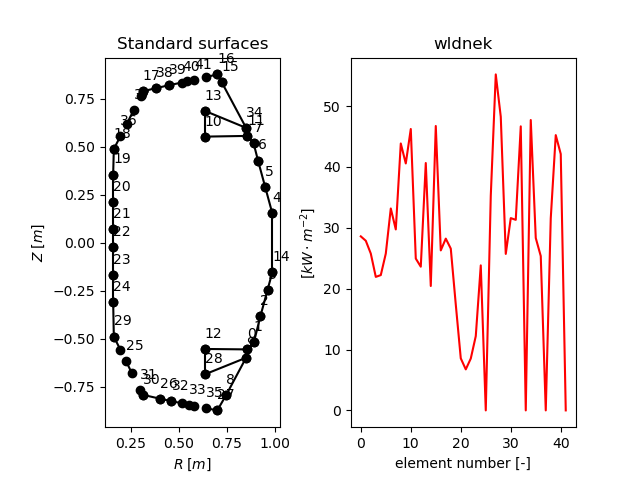

In [13]:
plot_wall_loads(where = path)

- Looks like there are 55 elements but only 42 are in poly, which is why Matteo only plots these.
- wldnek is the total energy deposited by the neutrals on the target in W
- wldnep is the total potential energy of the neutrals in W
- wlarea is the area but it's not needed since the above are already in W

0.0

In [12]:
neutrals_path

'c:\\collab\\tech\\compare_data\\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\\b2.neutrals.parameters'

In [34]:
# - Strata are W, E, W, E, S, S, S, N, N, C, C, V, T
# - N, S, W, E are SOL, core/PFR, inner lower target and outer lower target respectively
# - V is volume recombination source
# - C is gas puff source
# - T is time dependent source
# rcpos is same as BCPOS: for N, S, X it specifies row index. For W, E, Y it specifies column index.
# rcstart is the start coordinate of the strata
# rcend is the end coordionate of the strata

neutrals_path = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\b2.neutrals.parameters")
strata_settings = pd.read_csv(neutrals_path, names = [x for x in range(17)], sep = ",|=")
strata_settings = strata_settings.set_index(0, drop =True)
strata_settings = strata_settings.transpose()
strata_settings = strata_settings[["crcstra", "rcpos", "rcstart", "rcend"]]

strata_settings

C:\Users\Mike.Kryajak\AppData\Local\Temp\ipykernel_12748\2903344782.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  strata_settings = pd.read_csv(neutrals_path, names = [x for x in range(17)], sep = ",|=")


,crcstra,rcpos,rcstart,rcend
1,'W',-1,0,35
2,'E',48,0,35
3,'W',49,0,35
4,'E',110,0,35
5,'S',-1,0,11
6,'S',-1,36,47
7,'S',-1,50,67
8,'S',-1,92,109
9,'N',36,0,47
10,'N',36,50,109


In [49]:
d = nc.Dataset(os.path.join(path, "balance.nc"))
crx = d["crx"][:]
cry = d["cry"][:]
d.close()


In [48]:
crx

masked_array(
  data=[[[0.29782674, 0.29783023, 0.29817917, ..., 0.51576786,
          0.51664228, 0.51692565],
         [0.29778677, 0.29779026, 0.29813969, ..., 0.51583254,
          0.5167074 , 0.51699092],
         [0.29378931, 0.2937933 , 0.29419207, ..., 0.52230068,
          0.52322023, 0.52351806],
         ...,
         [0.22112172, 0.22112408, 0.22136024, ..., 0.62119693,
          0.62168114, 0.62183764],
         [0.20940267, 0.20940412, 0.20954922, ..., 0.63080624,
          0.63122276, 0.63134481],
         [0.1938511 , 0.19385188, 0.19392981, ..., 0.64127261,
          0.64159699, 0.64170183]],

        [[0.29783023, 0.29817917, 0.2992644 , ..., 0.51664228,
          0.51692565, 0.51692849],
         [0.29779026, 0.29813969, 0.29922647, ..., 0.5167074 ,
          0.51699092, 0.51699376],
         [0.2937933 , 0.29419207, 0.29543327, ..., 0.52322023,
          0.52351806, 0.52352103],
         ...,
         [0.22112408, 0.22136024, 0.22209384, ..., 0.62168114,
          0

In [46]:
d["crx"][:]

(4, 38, 112)

In [ ]:
strata = pd.DataFrame()

strata["code"] = ["W", "E", "W", "E", "S", "S", "S", "S", "N", "N", "C", "C", "V", "T"]
strata["pos"] = [-1, 48, 49, 110, -1, -1, -1, -1, 36, 36, 0, 0, 0, 0]
strata["start"] = [0, 0, 0, 0, 0, 36, 50, 92, 0, 50, 0, 0, 0, 0]
strata["end"] = [35, 35, 35, 35, 11, 47, 67, 109, 47, 109, 0, 0, 0, 0]

strata

In [43]:
wlddata = wld["wldnek"]

for i in range(wlddata.shape[1]):
    flux = sum(wlddata[:,i]) * 1e-6
    print(f"Stratum {i}: {flux:.3f} MW")
    
print(f"Sum of all strata: {np.sum(wlddata)*1e-6:.3e} MW")

Stratum 0: 1.022 MW
Stratum 1: 0.088 MW
Stratum 2: 0.090 MW
Stratum 3: 0.386 MW
Stratum 4: 0.383 MW
Stratum 5: 0.000 MW
Stratum 6: 0.000 MW
Stratum 7: 0.000 MW
Stratum 8: 0.000 MW
Stratum 9: 0.000 MW
Stratum 10: 0.003 MW
Stratum 11: 0.036 MW
Stratum 12: 0.035 MW
Stratum 13: 0.000 MW
Stratum 14: 0.000 MW
Sum of all strata: 2.044e+00 MW
